[exercises](recording.ipynb)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def ab_delays(beta, d, c=343):
    """Calculate delays for AB stereophony.
    
    beta: angle of incidence in degree, can be a scalar or a sequence
    d: distance between microphones in metres
    c: speed of sound in m/s
    
    """
    return d / c * np.sin(np.radians(beta))

In [3]:
def plot_ab_delays(max_beta, d, c=343, **kwargs):
    """Plot delays for AB stereophony.
    
    See ab_delays().
    
    """
    betas = np.linspace(-max_beta, max_beta, 100)
    delays = ab_delays(betas, d, c);
    plt.plot(betas, delays * 1000, **kwargs)
    plt.title("d = {} m".format(d))
    plt.xlabel("beta (degree)")
    plt.ylabel("delay (ms)")

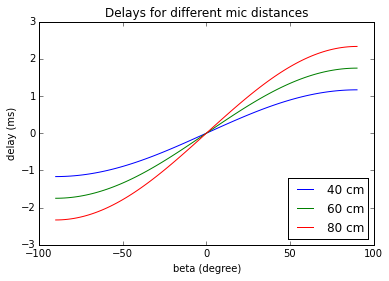

In [4]:
plot_ab_delays(90, 0.4, label="40 cm")
plot_ab_delays(90, 0.6, label="60 cm")
plot_ab_delays(90, 0.8, label="80 cm")
plt.title("Delays for different mic distances")
plt.legend(loc='lower right');

TODO: how to get a smaller recording angle (maximum useful delay: 1.2 ms, see Weinzierl, "Handbuch der Audiotechnik" (in German), p. 573)

In [5]:
def xy_weights(beta, epsilon, a, b):
    """Calculate weighting factors for XY stereophony.
    
    beta: angle of incidence in degree, can be a scalar or a sequence
    epsilon: opening angle of microphones in degree

    """
    Ax = a + b * np.cos(np.radians(epsilon + beta))
    Ay = a + b * np.cos(np.radians(epsilon - beta))
    return Ax, Ay

In [6]:
def plot_xy_weights(epsilon, a, b, pattern):
    """Create 3 plots showing the XY factors."""
    betas = np.arange(-180, 181)
    weights = np.column_stack(xy_weights(betas, epsilon, a, b))
    pos_weights = np.clip(weights, 0, None)
    neg_weights = -np.clip(weights, None, 0)
    
    title = "{}, ϵ = {} degree".format(pattern, epsilon)
    
    plt.figure()

    plt.polar(np.radians(betas), pos_weights)
    plt.gca().set_color_cycle(None)
    plt.polar(np.radians(betas), neg_weights, linewidth=2, linestyle='dashed')
    plt.gca().set_theta_zero_location('N')
    plt.title(title)
    
    plt.figure()
    
    plt.plot(betas, 20 * np.log10(np.abs(weights)))
    plt.title(title)
    plt.xlim(-180, 180)
    plt.ylim(-45, 3)
    plt.xlabel("beta / degree")
    plt.ylabel("$L_X$ and $L_Y$ / dB")

    plt.figure()

    # TODO: proper db() function
    differences = np.diff(20 * np.log10(np.abs(weights)), axis=1)
    
    plt.plot(betas, differences)
    plt.title(title)
    plt.xlim(-180, 180)
    plt.ylim(-50, 50)
    plt.xlabel("beta / degree")
    plt.ylabel("level difference / dB")

TODO: maximum meaningful level difference: between 15 and 18 dB (DIN EN 60268?)

/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:20: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:30: RuntimeWarning: divide by zero encountered in log10


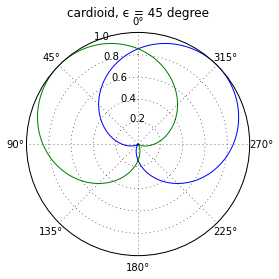

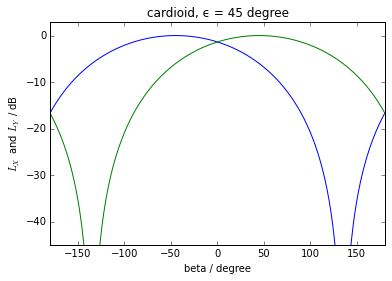

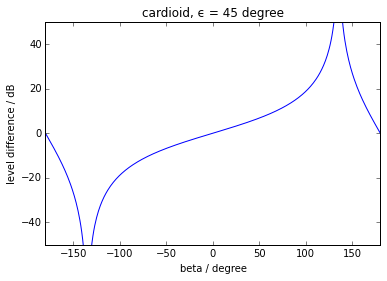

In [7]:
plot_xy_weights(45, 0.5, 0.5, "cardioid")

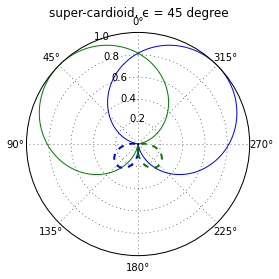

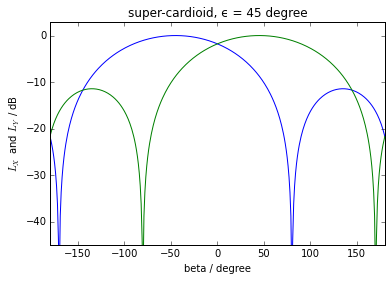

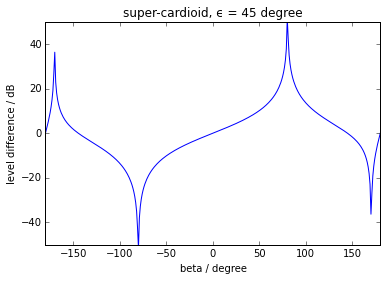

In [8]:
plot_xy_weights(45, 0.366, 0.634, "super-cardioid")

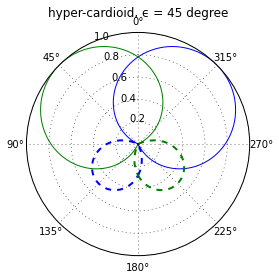

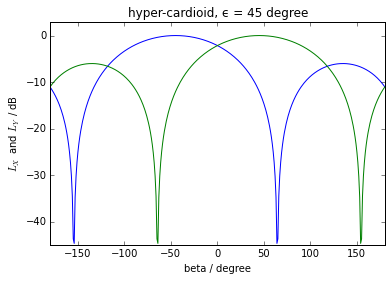

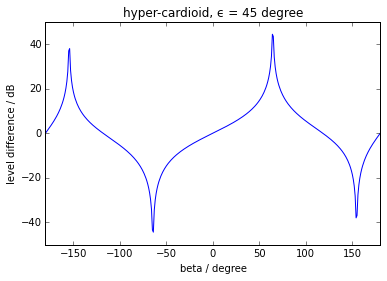

In [9]:
plot_xy_weights(45, 0.25, 0.75, "hyper-cardioid")

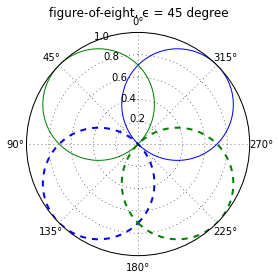

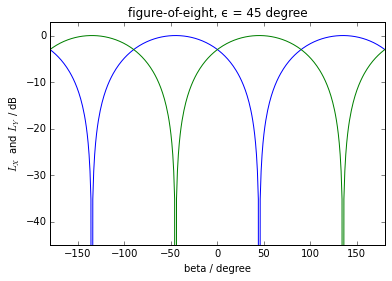

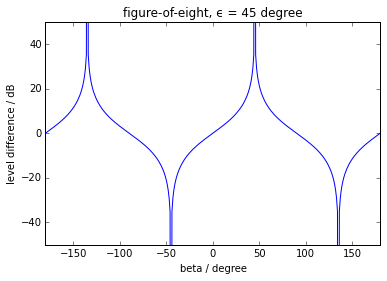

In [10]:
plot_xy_weights(45, 0, 1, "figure-of-eight")

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>